In [1]:
# Dependencies
import pandas as pd
import json
import csv
import matplotlib.pyplot as plt
import numpy as np

In [3]:
file_name = "master_videogame_data.csv"
master_df = pd.read_csv(file_name)
master_df.head()

,Unnamed: 0,level_0,index,1. open,2. high,3. low,4. close,5. volume,Month,Day,Year,Company,daily change,Date to Num,Month to Num
0,0,6,2017-12-29,63.59,63.8300,63.1200,63.32,3188465,December,Friday,2017,ATVI,-0.001262,5,12
1,1,7,2017-12-28,63.34,63.5000,62.6001,63.40,3102865,December,Thursday,2017,ATVI,0.000947,4,12
2,2,8,2017-12-27,63.67,63.7399,63.0700,63.34,4764842,December,Wednesday,2017,ATVI,-0.001734,3,12
3,3,9,2017-12-26,64.24,64.4700,63.3800,63.45,3203245,December,Tuesday,2017,ATVI,-0.016432,2,12
4,4,10,2017-12-22,64.86,64.9500,64.3800,64.51,3297781,December,Friday,2017,ATVI,-0.008758,5,12


In [4]:
day_to_num = []
month_to_num = []

x = 0

while x < len(master_df["Day"]):
    
    if master_df["Day"][x] == "Monday":
        day_to_num.append(1)
    elif master_df["Day"][x] == "Tuesday":
        day_to_num.append(2)
    elif master_df["Day"][x] == "Wednesday":
        day_to_num.append(3)
    elif master_df["Day"][x] == "Thursday":
        day_to_num.append(4)
    else:
        day_to_num.append(5)
        
    x += 1

z = 0

while z < len(master_df["Month"]):
    
    if master_df["Month"][z] == "January":
        month_to_num.append(1)
    elif master_df["Month"][z] == "February":
        month_to_num.append(2)
    elif master_df["Month"][z] == "March":
        month_to_num.append(3)
    elif master_df["Month"][z] == "April":
        month_to_num.append(4)
    elif master_df["Month"][z] == "May":
        month_to_num.append(5)
    elif master_df["Month"][z] == "June":
        month_to_num.append(6)
    elif master_df["Month"][z] == "July":
        month_to_num.append(7)
    elif master_df["Month"][z] == "August":
        month_to_num.append(8)
    elif master_df["Month"][z] == "September":
        month_to_num.append(9)
    elif master_df["Month"][z] == "October":
        month_to_num.append(10)
    elif master_df["Month"][z] == "November":
        month_to_num.append(11)
    else:
        month_to_num.append(12)
        
    z += 1

master_df["Date to Num"] = day_to_num
master_df["Month to Num"] = month_to_num
master_df.head()

,Unnamed: 0,level_0,index,1. open,2. high,3. low,4. close,5. volume,Month,Day,Year,Company,daily change,Date to Num,Month to Num
0,0,6,2017-12-29,63.59,63.8300,63.1200,63.32,3188465,December,Friday,2017,ATVI,-0.001262,5,12
1,1,7,2017-12-28,63.34,63.5000,62.6001,63.40,3102865,December,Thursday,2017,ATVI,0.000947,4,12
2,2,8,2017-12-27,63.67,63.7399,63.0700,63.34,4764842,December,Wednesday,2017,ATVI,-0.001734,3,12
3,3,9,2017-12-26,64.24,64.4700,63.3800,63.45,3203245,December,Tuesday,2017,ATVI,-0.016432,2,12
4,4,10,2017-12-22,64.86,64.9500,64.3800,64.51,3297781,December,Friday,2017,ATVI,-0.008758,5,12


In [5]:
Vol = []

x = 0

while x < len(master_df["Month"]):
    maximum = master_df["2. high"][x]
    minimum = master_df["3. low"][x]
    change = 0 
    change = (maximum - minimum) / minimum
    Vol.append(change)
    x += 1

master_df["Volatility"] = Vol
master_df.head()

,Unnamed: 0,level_0,index,1. open,2. high,3. low,4. close,5. volume,Month,Day,Year,Company,daily change,Date to Num,Month to Num,Volatility
0,0,6,2017-12-29,63.59,63.8300,63.1200,63.32,3188465,December,Friday,2017,ATVI,-0.001262,5,12,0.011248
1,1,7,2017-12-28,63.34,63.5000,62.6001,63.40,3102865,December,Thursday,2017,ATVI,0.000947,4,12,0.014375
2,2,8,2017-12-27,63.67,63.7399,63.0700,63.34,4764842,December,Wednesday,2017,ATVI,-0.001734,3,12,0.010622
3,3,9,2017-12-26,64.24,64.4700,63.3800,63.45,3203245,December,Tuesday,2017,ATVI,-0.016432,2,12,0.017198
4,4,10,2017-12-22,64.86,64.9500,64.3800,64.51,3297781,December,Friday,2017,ATVI,-0.008758,5,12,0.008854


In [8]:
day_change = master_df.groupby(["Date to Num"])

MeanofChange = (day_change["daily change"].mean()) * 100
SumofVolu = day_change["5. volume"].sum()
MeanofVol = (day_change["Volatility"].mean()) * 100


DayGrouped = pd.DataFrame({"Daily Change Average" : MeanofChange,
                       "Total Volume" : SumofVolu,
                          "Volatility": MeanofVol})

DayGrouped.to_csv("GameDaymasterdata.csv", index=False, header=True)
DayGrouped.head()

,Daily Change Average,Total Volume,Volatility
Date to Num,,,
1,-0.059244,10192745092,1.992858
2,0.104151,11769605302,1.990960
3,0.209387,11998290438,2.138973
4,0.098905,11748031478,2.048227
5,0.241747,13891640909,2.106932


In [9]:
month_change = master_df.groupby(["Month to Num"])

mMeanofChange = (month_change["daily change"].mean()) * 100
mSumofVolu = month_change["5. volume"].sum()
mMeanofVol = (month_change["Volatility"].mean()) * 100

MonthGrouped = pd.DataFrame({"Monthly Change Average" : mMeanofChange,
                       "Total Volume" : mSumofVolu,
                            "Volatility": mMeanofVol})

MonthGrouped.to_csv("GameMonthmasterdata.csv", index=False, header=True)
MonthGrouped.head(12)

,Monthly Change Average,Total Volume,Volatility
Month to Num,,,
1,0.099868,5879722702,2.308484
2,0.208191,5175838332,2.332767
3,0.131349,4845217573,1.861562
4,-0.003436,4999563031,1.834483
5,0.405677,4895912089,2.101575
6,-0.021353,5012396371,2.005197
7,0.232463,4925137333,1.895611
8,0.126632,4653992107,1.982110
9,0.008870,4947586357,1.974754


In [10]:
# Days/Months for plot labels
Days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
Months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

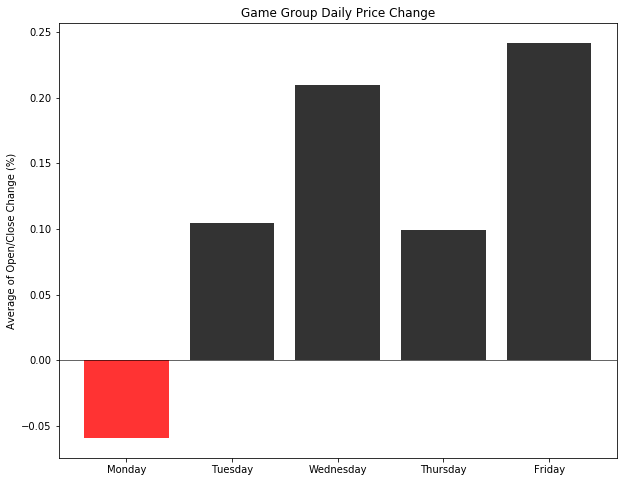

In [11]:
x_axis = np.arange(len(Days))
y_axis = DayGrouped["Daily Change Average"]

plt.figure(figsize=(10,8))

colors = []
for check in DayGrouped["Daily Change Average"]:
    if check >= 0:
        color = "black"
        colors.append(color)
    else:
        color = "r"
        colors.append(color)

plt.bar(x_axis, y_axis, color = colors, alpha=0.8, align="edge")

plt.axhline(y=0, linestyle='-', linewidth = 1, color = "black", alpha = .6)

tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, Days)

plt.ylabel("Average of Open/Close Change (%)")
plt.title("Game Group Daily Price Change")

plt.savefig("Figures/GameDDCA")
plt.show()

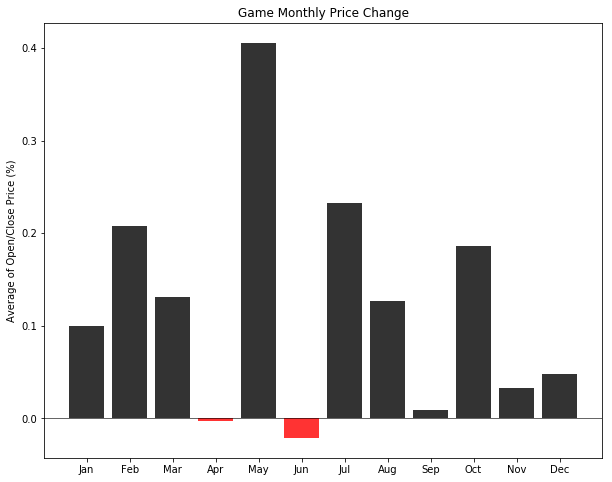

In [12]:
x_axis = np.arange(len(Months))
y_axis = MonthGrouped["Monthly Change Average"]

plt.figure(figsize=(10,8))

mcolors = []

for z in MonthGrouped["Monthly Change Average"]:
    if z >= 0:
        color = "black"
        mcolors.append(color)
    else:
        color = "red"
        mcolors.append(color)

plt.bar(x_axis, y_axis, color=mcolors, alpha=0.8, align="edge")

plt.axhline(y=0, linestyle='-', linewidth = 1, color = "black", alpha = .6)

tick_locations = [value+.4 for value in x_axis]
plt.xticks(tick_locations, Months)

plt.ylabel("Average of Open/Close Price (%)")
plt.title("Game Monthly Price Change")

plt.savefig("Figures/GameMDCA")
plt.show()

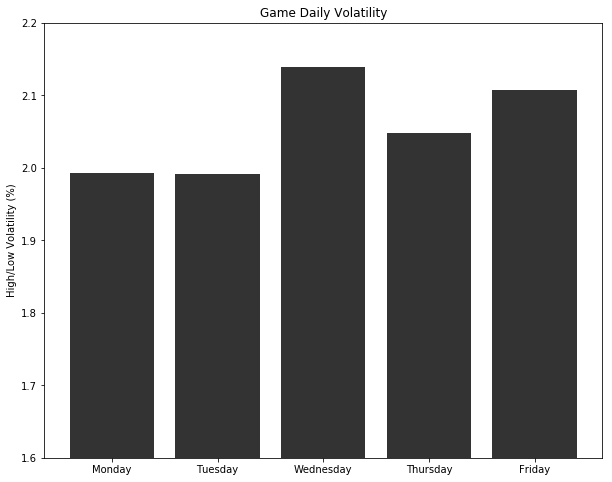

In [17]:
x_axis = np.arange(len(Days))
y_axis = DayGrouped["Volatility"]

plt.figure(figsize=(10,8))

plt.bar(x_axis, y_axis, color='black', alpha=0.8, align="edge")

tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, Days)
plt.ylim(1.6,2.2)

plt.ylabel("High/Low Volatility (%)")
plt.title("Game Daily Volatility")

plt.savefig("Figures/GameDV")
plt.show()

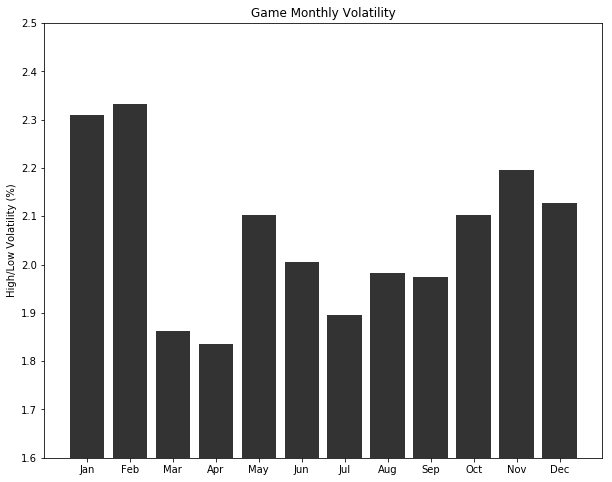

In [21]:
x_axis = np.arange(len(Months))
y_axis = MonthGrouped["Volatility"]

plt.figure(figsize=(10,8))

plt.bar(x_axis, y_axis, color='black', alpha=0.8, align="edge")

plt.axhline(y=0, linestyle='-', linewidth = 1, color = "black", alpha = .6)

tick_locations = [value+.4 for value in x_axis]
plt.xticks(tick_locations, Months)

#for a,b in zip(x_axis, y_axis):
    #plt.text(a, b, str(b))

plt.ylim(1.6,2.5)

plt.ylabel("High/Low Volatility (%)")
plt.title("Game Monthly Volatility")

plt.savefig("Figures/GameMV")
plt.show()

In [22]:
# Find index number of year breaks to plot on line chart
companies = master_df["Company"].unique()
comp_zero = master_df.loc[master_df["Company"] == companies[0], :]

invert_df = comp_zero.sort_index(ascending=False)

year_break = [0]
counter = 0
z = 0
while z < (len(invert_df["Year"]) - 2):
    if invert_df["Year"][z] == invert_df["Year"][(z+1)]:
        counter += 1
    else:
        year_break.append(counter)
        counter += 1
    
    z += 1
    
year_break

[0, 250, 502, 754, 1006]

In [23]:
# Make new DFs for each company and invert over index to chart individual lines
companies = master_df["Company"].unique()
zero_to_four = ["zero", "one", "two", "three", "four"]

comp_zero = master_df.loc[master_df["Company"] == companies[0], :]
invert_zero = comp_zero.sort_index(ascending=False)

comp_one = master_df.loc[master_df["Company"] == companies[1], :]
invert_one = comp_one.sort_index(ascending=False)

comp_two = master_df.loc[master_df["Company"] == companies[2], :]
invert_two = comp_two.sort_index(ascending=False)

comp_three = master_df.loc[master_df["Company"] == companies[3], :]
invert_three = comp_three.sort_index(ascending=False)

comp_four = master_df.loc[master_df["Company"] == companies[4], :]
invert_four = comp_four.sort_index(ascending=False)

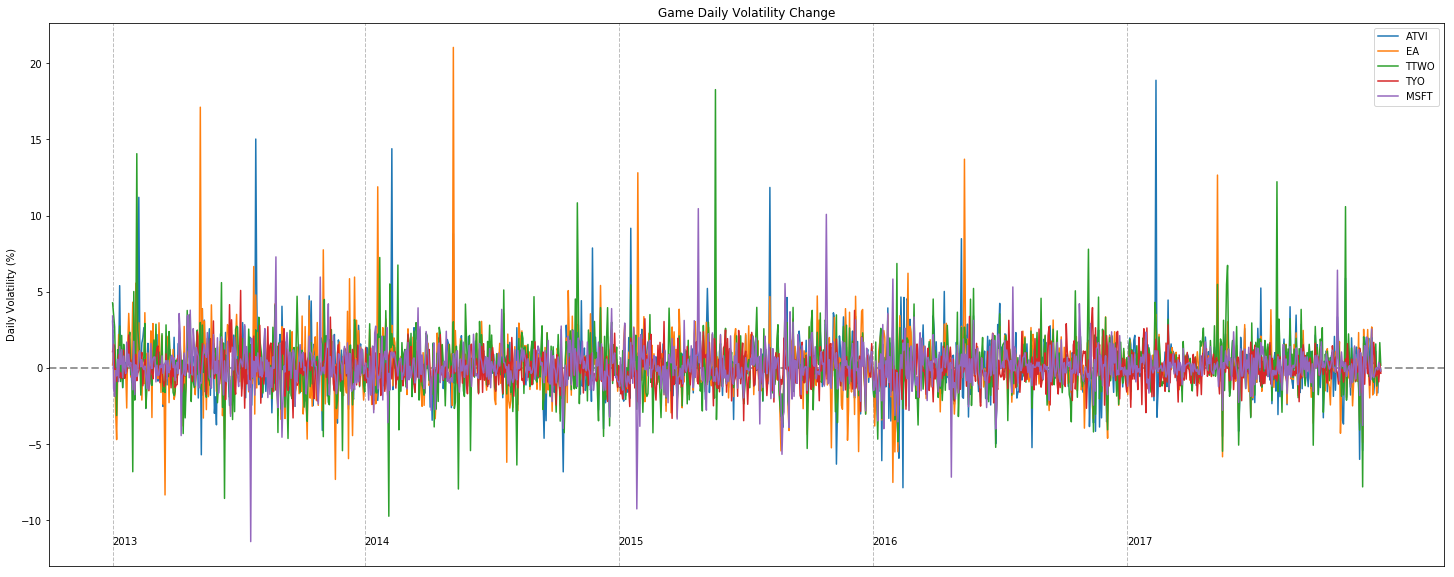

In [25]:
x_axis = np.arange(len(comp_one["Company"]))
y_axis = (invert_df["daily change"] * 100)
plt.figure(figsize=(25,10))

f = 0
year_label = invert_df["Year"].unique()
year_count = 0
for year in year_break: 
    plt.axvline(x=(year), linestyle = "--", linewidth = 1, color = "black", alpha = .25, gid = year_label[year_count])
    plt.text(year, (min(invert_df["daily change"] * 100) - 3.7), year_label[year_count])
    f += 1
    year_count += 1

plt.xticks([],[])
plt.axhline(y=0, linestyle='--', linewidth = 2, color = "black", alpha = .4)
plt.ylabel("Daily Volatility (%)")
plt.title("Game Daily Volatility Change")

zero = (invert_zero["daily change"] * 100)
one = (invert_one["daily change"] * 100)
two = (invert_two["daily change"] * 100)
three = (invert_three["daily change"] * 100)
four = (invert_four["daily change"] * 100)

zero_plot = plt.plot(x_axis, zero, label=companies[0])
one_plot = plt.plot(x_axis, one, label = companies[1])
two_plot = plt.plot(x_axis, two, label = companies[2])
three_plot = plt.plot(x_axis, three, label = companies[3])
four_plot = plt.plot(x_axis, four, label = companies[4])

plt.legend(handles=[zero_plot[0], one_plot[0], two_plot[0], three_plot[0], four_plot[0]])

plt.savefig("Figures/GameDailyVolLineFull")
plt.show()

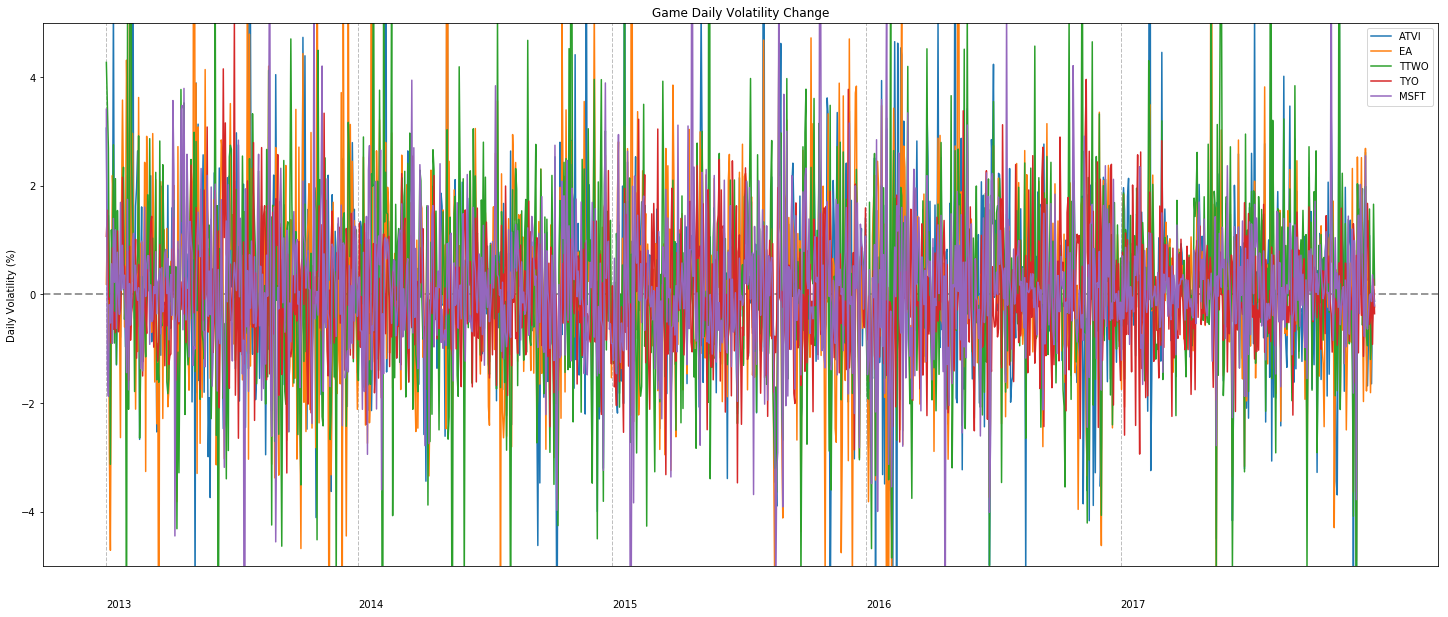

In [26]:
x_axis = np.arange(len(comp_one["Company"]))
y_axis = (invert_df["daily change"] * 100)
plt.figure(figsize=(25,10))

f = 0
year_label = invert_df["Year"].unique()
year_count = 0
for year in year_break: 
    plt.axvline(x=(year), linestyle = "--", linewidth = 1, color = "black", alpha = .25, gid = year_label[year_count])
    plt.text(year, (min(invert_df["daily change"] * 100) + 2.1), year_label[year_count])
    f += 1
    year_count += 1

plt.xticks([],[])
plt.axhline(y=0, linestyle='--', linewidth = 2, color = "black", alpha = .4)
plt.ylabel("Daily Volatility (%)")
plt.title("Game Daily Volatility Change")

plt.ylim(-5,5)

zero = (invert_zero["daily change"] * 100)
one = (invert_one["daily change"] * 100)
two = (invert_two["daily change"] * 100)
three = (invert_three["daily change"] * 100)
four = (invert_four["daily change"] * 100)

zero_plot = plt.plot(x_axis, zero, label=companies[0])
one_plot = plt.plot(x_axis, one, label = companies[1])
two_plot = plt.plot(x_axis, two, label = companies[2])
three_plot = plt.plot(x_axis, three, label = companies[3])
four_plot = plt.plot(x_axis, four, label = companies[4])

plt.legend(handles=[zero_plot[0], one_plot[0], two_plot[0], three_plot[0], four_plot[0]])

plt.savefig("Figures/GameDailyVolLineCut")
plt.show()